# Generación y análisis del índice de sentimiento de la política monetaria de México: Hawkish y Dovish. 

Enríquez Hernández Leobardo

Tlahiz Tenorio Giovanni Saúl



## Introducción

En este documento, generamos a partir de las minutas de política monetaria que publica el Banco de México, un índice de sentimiento que refleja la posición del Banco Central mexicano frente a la inflación. En estos documentos se dan los principales argumentos que sostienen las decisiones de aumentar, mantener o disminuir las tasas de interés de referencia u objetivo. Los objetivos de este trabajo son en primer lugar el de generar un índice de sentimiento de la política monetaria y describir la relación de éste índice con los cambios en las tasas de interés en un periodo de 2018 a 2024, y en segundo lugar, realizar un análisis de este índice como una serie de tiempo.   

El Banco de México es el ente encargado de la política monetaria y su objetivo primordial es el de mantener una inflación baja y estable, para ello cuenta con algunas herramientas de política monetaria, tales como los movimientos de las tasas de interés de referencia. El Banco de México publica las minutas que es la versión escrita de las discusiones y los argumentos que los subgobernadores exponen para respaldar su decisión en uno u otro sentido. En estos docuemntos se reflejan los sentimientos y las preocupaciones, por lo que el lenguaje que se emplea puede reflejar y estar muy relacionada con la decisión final de aumentar, mantener o disminuir la tasa de interés. En ese sentido, se ha desarrollado en la literatura, una serie de clasificaciones de palabras y/o frases que podrían reflejar ya sea un tono  hawkish, que hace referencia a una política monetaria restrictiva, o un tono dovish, que hace referencia a una política expansiva. Esto quiere decir que si en una minuta domina un tono hawkish,  se opta por una subida de tasas de interés  para controlar el alza de precios e impulsar la apreciación del tipo de cambio por medio de la contracción de la demanda y el consumo. Si lo que domina es un tono dovish, se relaja o baja las tasas de interés para estimular la economía a través de mayor inversión. 

En la primera parte de este documento, se hace un análisis de texto a partir de los archivos PDF de las minutas disponibles de la página del Banco de México. A partir de las palabras hawkish y dovish se genera un cociente o índice hawkish/dovish, que si es mayor que uno, estaría reflejando un sentimiento de política monetaria restriciva. En esta misma sección se incorpora la información de los cambios en las tasas durante el periodo estudiado y se grafican, tanto el índice como estos cambios para ver si el tono va de la mano con las decisiones tomadas. En la segnda sección se reliza un análisis del índice como serie de tiempo, y se ajustará algún modelo AR(p), MA(q), ARMA(p,q), ARIMA(p,d,q), o SARIMA(p,d,q)(P,D,Q)s. Finalmente se hará una breve conclusión del análisis presentado.  



## Generación y comparación del índice de sentimiento con cambios en la tasa de interés

### Generación del índice

En esta sección se presenta el código empleado para realizar el análisis de texto de las minutas en PDF. 

In [1]:
%reset -sf #removes variables
%clear

Don't know how to reset  #removes, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details



In [2]:
import unicodedata
import re #used to clean text
import nltk #used to perform NLP
from nltk.corpus import stopwords #Importing stopwords
from nltk.stem.porter import PorterStemmer #Keeping the root of the words
from nltk import ngrams
import pdfplumber
import os
from collections import Counter
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import collections

#  nltk.download('stopwords')

def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: 
        pass
    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    return str(text)

def flatten(t):
    return [item for sublist in t for item in sublist]

In [3]:
total_list = []

In [4]:
for file in os.listdir('./Reportes'):
    print(file)
    filename = os.fsdecode(file)
    
    if filename.endswith('.pdf'):
        current_pdf = []
        
        with pdfplumber.open('./Reportes/'+file) as pdf:
            for pdf_page in pdf.pages:
                single_page_text = pdf_page.extract_text()
                current_pdf.append(single_page_text)
        current_pdf = [sheet for sheet in current_pdf if sheet is not None]
        current_pdf = [sheet.replace('\n','') for sheet in current_pdf]
        current_pdf = ' '.join(current_pdf)
    
        corpus = []
        corpus_joined = []
    
        # Remove accents
        current_pdf = strip_accents(current_pdf)
        # Remove numbers
        current_pdf = re.sub('[^a-zA-Z]', ' ', current_pdf)
        # Convert to lowercase
        current_pdf = current_pdf.lower()
        # Divide words
        current_pdf = current_pdf.split()
        # Instanciating porter steamer
        ps = PorterStemmer()
        # Remove spanish stopwords
        current_pdf = [ps.stem(word) for word in current_pdf if not word in set(stopwords.words('spanish'))]    

        counts = Counter(current_pdf)

        listas_finales = pd.DataFrame(counts.most_common(10000))
        lista_finales_tabla_ = listas_finales.set_index([0])
    
    #####HAWKISH WORDS #### 
        lista_finales_tabla_aceler=lista_finales_tabla_.loc[[s.startswith('aceler') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_ajust=lista_finales_tabla_.loc[[s.startswith('ajust') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_alto=lista_finales_tabla_.loc[[s.startswith('alto') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_alta=lista_finales_tabla_.loc[[s.startswith('alta') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_alza=lista_finales_tabla_.loc[[s.startswith('alza') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_aprecia=lista_finales_tabla_.loc[[s.startswith('aprecia') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_apret=lista_finales_tabla_.loc[[s.startswith('apret') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_arriba=lista_finales_tabla_.loc[[s.startswith('arriba') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_ascend=lista_finales_tabla_.loc[[s.startswith('ascend') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_aument=lista_finales_tabla_.loc[[s.startswith('aument') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_creci=lista_finales_tabla_.loc[[s.startswith('creci') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_eleva=lista_finales_tabla_.loc[[s.startswith('eleva') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_estimul=lista_finales_tabla_.loc[[s.startswith('estimul') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_expan=lista_finales_tabla_.loc[[s.startswith('expan') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_forta=lista_finales_tabla_.loc[[s.startswith('forta') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_fuert=lista_finales_tabla_.loc[[s.startswith('fuert') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_impuls=lista_finales_tabla_.loc[[s.startswith('impuls') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_incentiv=lista_finales_tabla_.loc[[s.startswith('incentiv') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_increment=lista_finales_tabla_.loc[[s.startswith('increment') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_mayor=lista_finales_tabla_.loc[[s.startswith('mayor') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_positiv=lista_finales_tabla_.loc[[s.startswith('positiv') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_rapid=lista_finales_tabla_.loc[[s.startswith('rapid') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_reforz=lista_finales_tabla_.loc[[s.startswith('reforz') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_refuerz=lista_finales_tabla_.loc[[s.startswith('refuerz') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_restrin=lista_finales_tabla_.loc[[s.startswith('restrin') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_subir=lista_finales_tabla_.loc[[s.startswith('subir') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_subio=lista_finales_tabla_.loc[[s.startswith('subio') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_subieron=lista_finales_tabla_.loc[[s.startswith('subieron') for s in lista_finales_tabla_.index] ]

#####DOVISH WORDS ####
        lista_finales_tabla_caid=lista_finales_tabla_.loc[[s.startswith('caid') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_holgura=lista_finales_tabla_.loc[[s.startswith('holgura') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_bajo=lista_finales_tabla_.loc[[s.startswith('bajo') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_baja=lista_finales_tabla_.loc[[s.startswith('baja') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_depreci=lista_finales_tabla_.loc[[s.startswith('depreci') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_ampli=lista_finales_tabla_.loc[[s.startswith('ampli') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_abajo=lista_finales_tabla_.loc[[s.startswith('abajo') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_descend=lista_finales_tabla_.loc[[s.startswith('descend') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_disminu=lista_finales_tabla_.loc[[s.startswith('disminu') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_decreci=lista_finales_tabla_.loc[[s.startswith('decreci') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_limit=lista_finales_tabla_.loc[[s.startswith('limit') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_contrac=lista_finales_tabla_.loc[[s.startswith('contrac') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_debil=lista_finales_tabla_.loc[[s.startswith('debil') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_atenu=lista_finales_tabla_.loc[[s.startswith('atenu') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_desincent=lista_finales_tabla_.loc[[s.startswith('desincent') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_decre=lista_finales_tabla_.loc[[s.startswith('decre') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_meno=lista_finales_tabla_.loc[[s.startswith('meno') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_negativ=lista_finales_tabla_.loc[[s.startswith('negativ') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_lent=lista_finales_tabla_.loc[[s.startswith('lent') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_redu=lista_finales_tabla_.loc[[s.startswith('redu') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_deterior=lista_finales_tabla_.loc[[s.startswith('deterior') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_reactiv=lista_finales_tabla_.loc[[s.startswith('reactiv') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_bajar=lista_finales_tabla_.loc[[s.startswith('bajar') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_incertidumb=lista_finales_tabla_.loc[[s.startswith('incertidumb') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_inciert=lista_finales_tabla_.loc[[s.startswith('inciert') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_recort=lista_finales_tabla_.loc[[s.startswith('recort') for s in lista_finales_tabla_.index] ]


        hawkish_t = pd.concat([lista_finales_tabla_aceler,lista_finales_tabla_ajust, lista_finales_tabla_alto, lista_finales_tabla_alta, lista_finales_tabla_alza, lista_finales_tabla_aprecia, lista_finales_tabla_apret, lista_finales_tabla_arriba, lista_finales_tabla_ascend, lista_finales_tabla_aument, lista_finales_tabla_creci, lista_finales_tabla_eleva, lista_finales_tabla_estimul, lista_finales_tabla_expan, lista_finales_tabla_forta, lista_finales_tabla_fuert, lista_finales_tabla_impuls, lista_finales_tabla_incentiv, lista_finales_tabla_increment, lista_finales_tabla_mayor, lista_finales_tabla_positiv, lista_finales_tabla_rapid, lista_finales_tabla_reforz, lista_finales_tabla_refuerz, lista_finales_tabla_restrin, lista_finales_tabla_subir, lista_finales_tabla_subio, lista_finales_tabla_subieron])
        dovish_t = pd.concat([lista_finales_tabla_caid,lista_finales_tabla_holgura, lista_finales_tabla_bajo, lista_finales_tabla_baja, lista_finales_tabla_depreci, lista_finales_tabla_ampli, lista_finales_tabla_abajo, lista_finales_tabla_descend, lista_finales_tabla_disminu, lista_finales_tabla_decreci, lista_finales_tabla_limit, lista_finales_tabla_contrac, lista_finales_tabla_debil, lista_finales_tabla_atenu, lista_finales_tabla_desincent, lista_finales_tabla_decre, lista_finales_tabla_meno, lista_finales_tabla_negativ, lista_finales_tabla_lent, lista_finales_tabla_redu, lista_finales_tabla_deterior, lista_finales_tabla_reactiv, lista_finales_tabla_bajar, lista_finales_tabla_incertidumb, lista_finales_tabla_inciert, lista_finales_tabla_recort])

        m_li = [file,hawkish_t.sum().values,dovish_t.sum().values]
        total_list.append(m_li)
        

        
        
        

Minuta100_18_05_23.pdf
Minuta101_22_06_23.pdf
Minuta102_10_08_23.pdf
Minuta103_28_09_23.pdf
Minuta104_09_11_23.pdf
Minuta105_14_12_23.pdf
Minuta106_08_02_24.pdf
Minuta57_08_02_18_a.pdf
Minuta58_12_04_18.pdf
Minuta59_17_05_18.pdf
Minuta60_21_06_18_a.pdf
Minuta61_02_08_18.pdf
Minuta62_04_10_18.pdf
Minuta63_15_11_18_a.pdf
Minuta64_20_12_18_a.pdf
Minuta65_07_02_19.pdf
Minuta66_28_03_19.pdf
Minuta67_16_05_19.pdf
Minuta68_27_06_19.pdf
Minuta69_15_08_19_d.pdf
Minuta70_26_09_19_d.pdf
Minuta71_14_11_19_d.pdf
Minuta72_19_12_19_d.pdf
Minuta73_13_02_20_d.pdf
Minuta74_20_03_20_d.pdf
Minuta75_21_04_20_d.pdf
Minuta76_14_05_20_d.pdf
Minuta77_25_06_20_d.pdf
Minuta78_13_08_20_d.pdf
Minuta79_24_09_20_d.pdf
Minuta80_12_11_20.pdf
Minuta81_17_12_20.pdf
Minuta82_11_02_21_d.pdf
Minuta83_25_04_21.pdf
Minuta84_13_05_21.pdf
Minuta85_24_06_21_a.pdf
Minuta86_12_08_21_a.pdf
Minuta87_30_09_21_a.pdf
Minuta88_11_11_21_a.pdf
Minuta89_16_12_21_a.pdf
Minuta90_10_02_22_a.pdf
Minuta91_24_03_22_a.pdf
Minuta92_12_05_22_a.pdf

In [5]:
base_final = pd.DataFrame.from_records(total_list)

In [6]:
base_final["minutas"] = base_final[0]
base_final["hawkish"] = base_final[1]
base_final["dovish"] = base_final[2]
base_final.drop([0,1,2], axis='columns', inplace=True)


In [7]:
to_minutas = pd.read_csv("to_minutas.csv")

In [8]:
base = (pd.merge(base_final, to_minutas, on='minutas'))
base =base.sort_values(by=['no'])

In [9]:
base['haw/dov']= base['hawkish']/base['dovish']

In [10]:
haw_dov=base['haw/dov']
flat_list = []
for xs in haw_dov:
    for x in xs:
        flat_list.append(x)        
flat_list=pd.DataFrame(flat_list)
haw_dov = flat_list.rename(columns={0: 'haw_dov'})
haw_dov['no']=range(1,51,1)
haw_dov=(pd.merge(haw_dov, to_minutas, on='no'))
haw_dov=haw_dov.drop(['minutas', 'minuta', 'Unnamed: 6'], axis=1)
haw_dov['haw_dov'] = haw_dov.pop('haw_dov')
haw_dov
#haw_dov.dtypes
#haw_dov.describe()

,no,fecha,to,to_cambio,haw_dov
0,1,08/02/2018,7.50,0.25,2.025000
1,2,12/04/2018,7.50,0.00,1.442786
2,3,17/05/2018,7.50,0.00,1.729885
3,4,21/06/2018,7.75,0.25,1.822086
4,5,02/08/2018,7.75,0.00,1.782857
5,6,04/10/2018,7.75,0.00,2.237410
6,7,15/11/2018,8.00,0.25,1.703704
7,8,20/12/2018,8.25,0.25,1.355932
8,9,07/02/2019,8.25,0.00,1.166667
9,10,28/03/2019,8.25,0.00,1.170370


### Comparación del índice con los cambios en las tasas de interés

En esta sección graficamos el índice generado en la sección anterior y lo comparamos visualmente con los cambios en las tasas de interés en el periodo de febrero de 2018 a febrero de 2024. El comportamiento en ambos indicados es muy parecido, naturalmente con distintas escalas, por lo que podemos decir que el tono o el sentimiento expresado por los tomadores de decisiones de política monetaria sí se ven reflejados en la decisión de aumentar, mantener o subir la tasa de interés objetivo.  

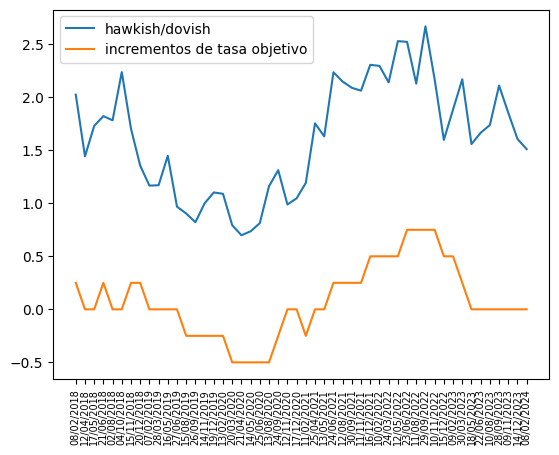

In [11]:
plt.plot(haw_dov['fecha'], base['haw/dov'], label = "hawkish/dovish")
plt.plot(haw_dov['fecha'], base['to_cambio'], label = "incrementos de tasa objetivo")

plt.legend()
plt.xticks(fontsize=7,rotation=90)
plt.show()

Analizando la misma gráfica anterior, si ponemos la escala  de los cambios en la tasa de interés en el eje izquierdo y la escala del índice hawkish/dovish a la derecha, podemos observar que la relación entre ambas variables es aún más clara. Aún cuando hay ciertas minutas en que la distancia se agranda un poco, el comportamiento general, tanto en las tendencias y cíclos, parecen coincidir bastante. 

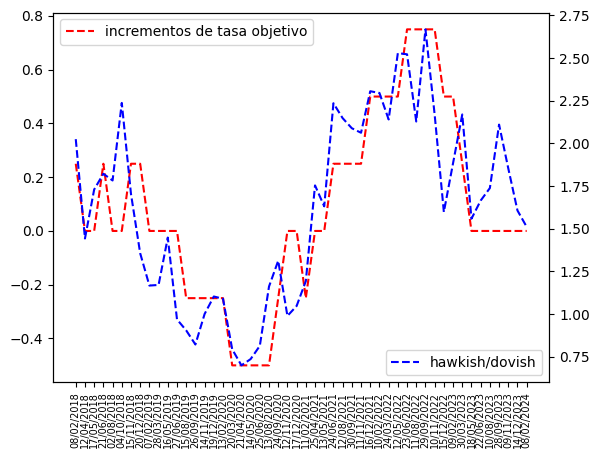

In [12]:
fig, ax = plt.subplots()
plt.plot(haw_dov['fecha'], base['to_cambio'],  '--r', label = "incrementos de tasa objetivo")
plt.legend(loc='upper left')

plt.xticks(fontsize=7,rotation=90)


ax2 = ax.twinx()
plt.plot(haw_dov['fecha'], base['haw/dov'],  '--b', label = "hawkish/dovish")
plt.legend(loc='lower right')
plt.xticks(fontsize=7, rotation=90)

plt.show()


In [13]:
#haw_dov.to_csv("haw_dov.csv", index=False)

## Análisis del índice de sentimiento como serie de tiempo

En esta sección se analiza la serie de tiempo generada, para adaptar con él un modelo AR(p), MA(q), ARMA(p,q), ARIMA(p,d,q), o SARIMA(p,d,q)(P,D,Q)s.  


En la siguiente gráfica, no se muestra de manera clara si hay estacionalidad en la serie, si bien la onda sinusoidal amortiguada sale de las bandas para algunos periodos, no hay un patrón claro de algún ciclo cada cierto periodo.  

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

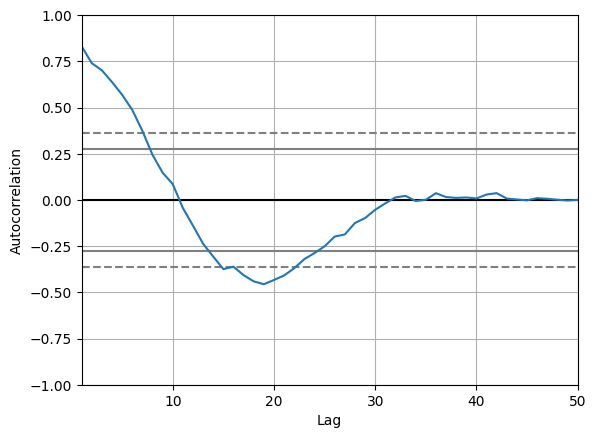

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(haw_dov['haw_dov'])

En la siguiente gráfica se muestra el correlograma de autocorrelación. Los gráficos ACF muestran la correlación entre una serie temporal y una versión retrasada de sí misma, y disminuye exponencialmente, pero se hace más negativo. 

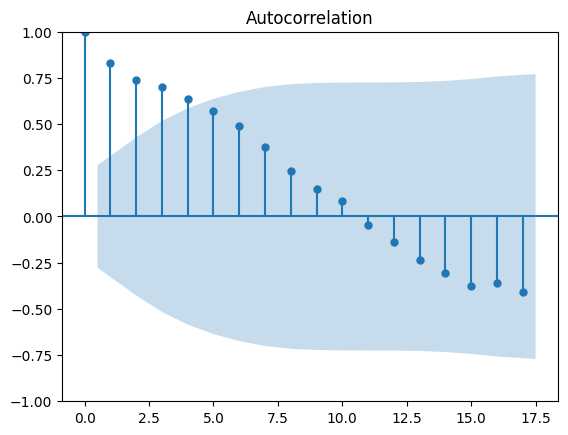

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(haw_dov['haw_dov'])
plt.show()

Los gráficos PACF muestran la correlación entre una serie temporal y una versión retrasada de sí misma después de eliminar los efectos de las observaciones intermedias. El gráfico PACF mostrado a continuación, muestra una caída abrupta, donde sobre sale de las bandas el primer retardo. 

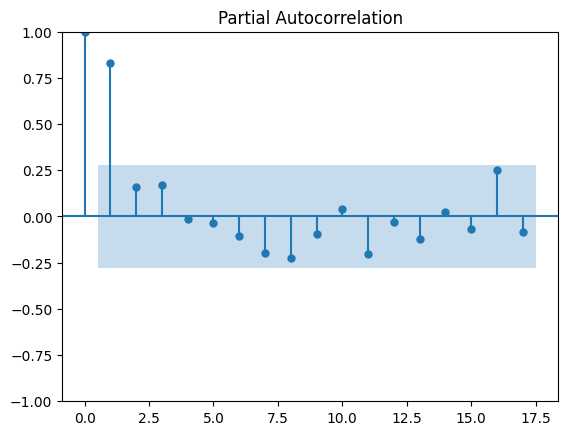

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(haw_dov['haw_dov'], method='ywm')
plt.show()

La descomposición de series de tiempo es una técnica estadística que implica descomponer una serie de tiempo en sus componentes subyacentes para comprender mejor sus patrones y mejorar la precisión de los pronósticos. Los componentes más comunes de una serie temporal son la tendencia, la estacionalidad y el residuo. En la siguiente descomposición podemos ver los componentes de nuestra serie de tiempo. 

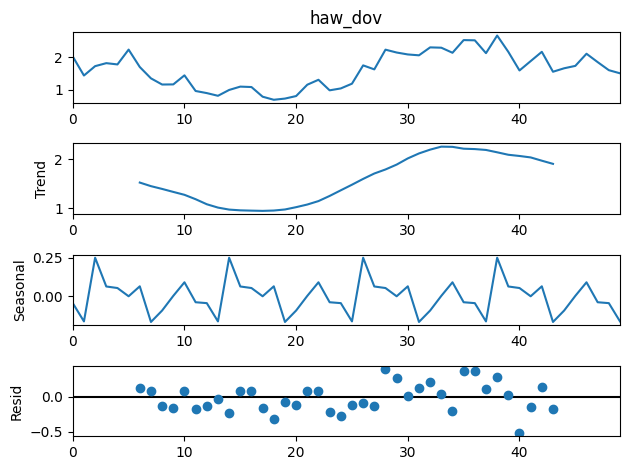

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(haw_dov['haw_dov'],model='additive',period=12)
decomposition.plot()
plt.show()

La prueba ADF (Dickey-Fuller aumentada) es una prueba de significación estadística para ver si una serie es estacionaria o no, que plantea la hipótesis nula de que la serie es no estacionaria contra la alternativa de que la serie es estacionaria. Observemos que si aplicamos esta prueba a nuestra serie nos muestra una p-value de 0.2374, lo cual indica que no hay evidencia que nos permita rechazar la hipótesis nula de no estacionalidad de la serie.  

In [18]:
#Augmented Dickey-Fuller Test
#Ho:the series is non-stationary (p-value<0.05 to reject Ho)
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(haw_dov.haw_dov, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.1177544654688067
2. P-Value :  0.23743562893394304
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 49
5. Critical Values :
	 1% :  -3.5714715250448363
	 5% :  -2.922629480573571
	 10% :  -2.5993358475635153


A continuación usaremos la serie original no estacionaria y aplicamos la función de autoarima, solamente para ver cuál es el modelo recomendado y comparar más adelante con algún modelo con la serie estacionaria. 

In [19]:
###### SARIMA #########
## Original serie
import pmdarima as pmd
model1=pmd.auto_arima(haw_dov['haw_dov'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=31.697, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=27.195, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=29.304, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=28.112, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=25.252, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=29.194, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=29.194, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=27.345, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=26.220, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=27.831, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.714 seconds


A continuación tomaremos la serie modificada por una diferencia y realizamos la prueba ADF para ver si se vuelve estacionaria. Como el p-value asociado a la prueba es de 1.9559e-08, se rechza la hipótesis nula de no estacionalidad. 

In [20]:
#### ARIMA ######
###   Difference (n)
data_diff=haw_dov['haw_dov'].diff(periods=1)

dftest = adfuller(data_diff.dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -6.4047285297691285
2. P-Value :  1.9559953153157473e-08
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 47
5. Critical Values :
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064


A continuación se presenta la gráfica de la serie diferenciada. 

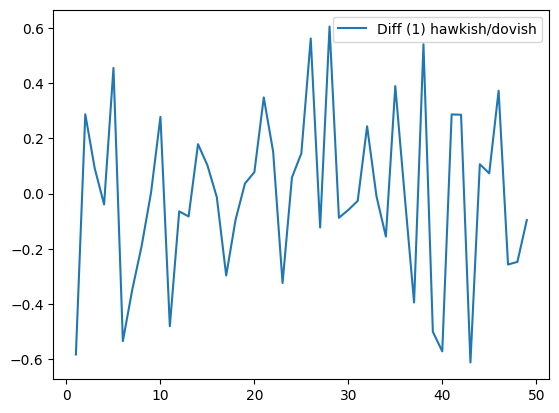

In [21]:
plt.plot(data_diff, label = "Diff (1) hawkish/dovish")
plt.legend()
plt.show()

Aplicando el autoarima a la serie de tiempo diferenciada tenemos los resultados siguientes. 

In [22]:
import pmdarima as pmd

model2=pmd.auto_arima(data_diff.dropna(),start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=31.697, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=27.195, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=29.304, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=28.112, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=25.252, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=29.194, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=29.194, Time=0.02 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=27.345, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=26.220, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=27.831, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 0.666 seconds


Acontinuación ajustamos el mejor modelo, considerando que de los datos originales se hacen diferencias para volverlo estacionario. En este sentido, tomaremos el modelo ARIMA(0,1,0)(0,0,0)[12] del model1.  

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima=SARIMAX(haw_dov['haw_dov'],order=(0,1,0),seasonal_order=(0,0,0,12))
predicted=sarima.fit().predict()


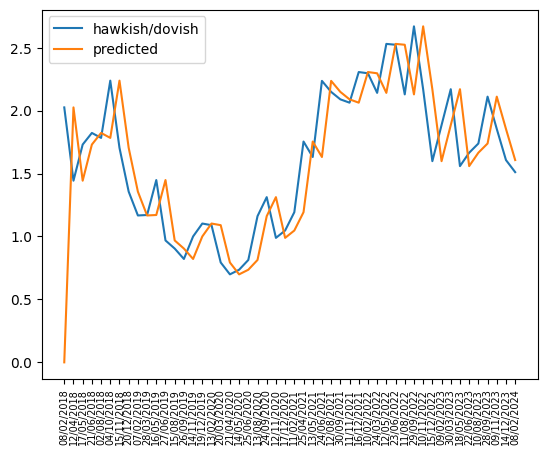

In [24]:
plt.plot(haw_dov['fecha'], haw_dov['haw_dov'], label = "hawkish/dovish")
plt.plot(haw_dov['fecha'], predicted, label = "predicted")

plt.legend()
plt.xticks(fontsize=7,rotation=90)
plt.show()

Haremos un diágnóstico del modelo1. Parece ser que no hay un patrón claro en los residuales estadarizados, por lo que tienen una media de cero y varianza constante.  La curva del Kernel Density Estimation (KDE) es muy similar la la de la normal estándar de media cero y varianza 1. En la gráfica Q-Q plot se observa que la mayoría de los puntos están en la recta. Finalmente, no hay valores que salgan de los intervalos de confianza en el correlograma. Por lo tanto, podemos usar el modelo para predicciones. 

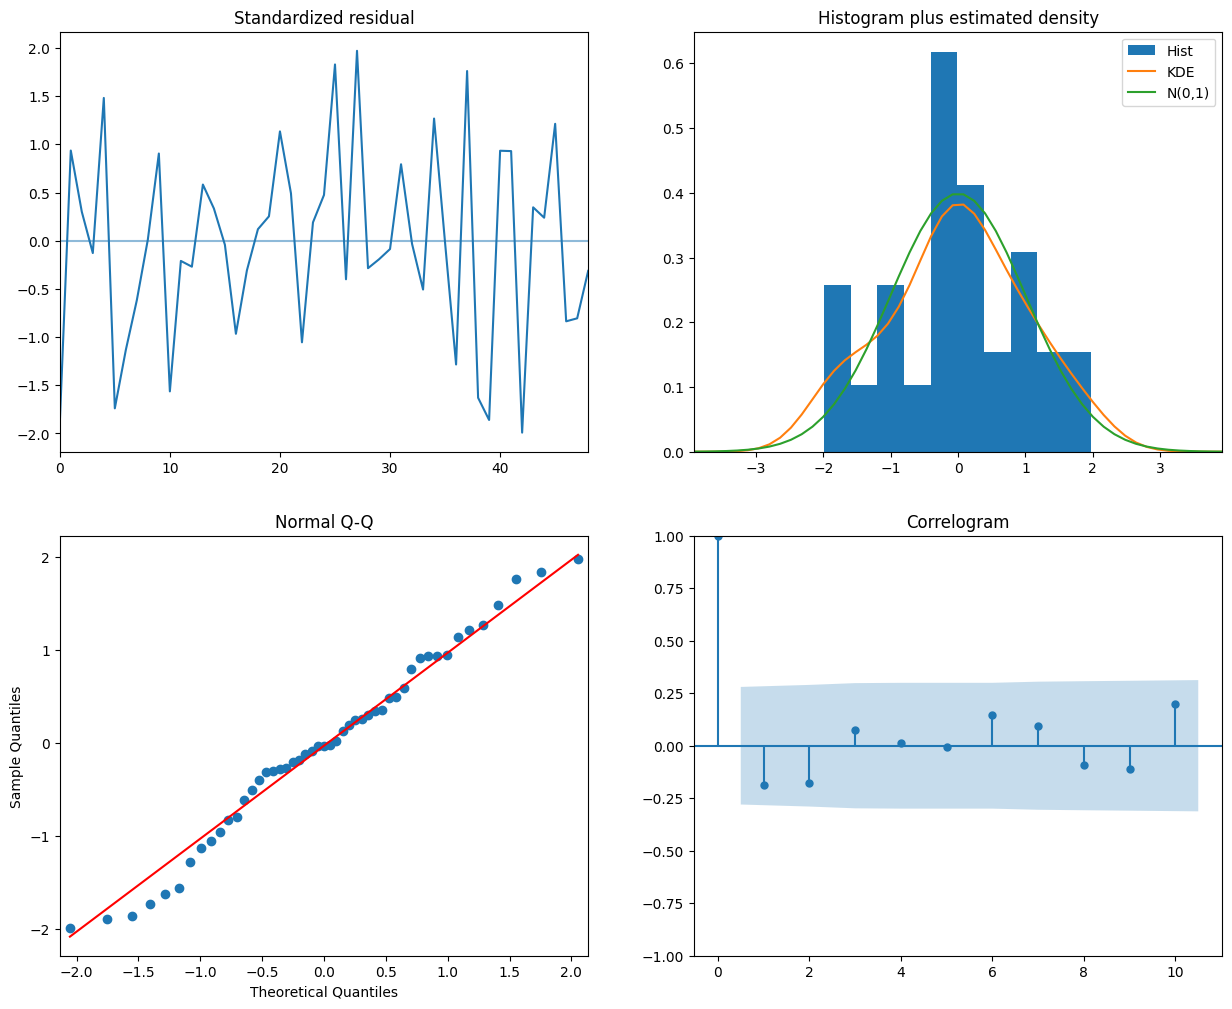

In [25]:
model1.plot_diagnostics(figsize=(15,12))
plt.show()

## Conclusiones

El análisis de texto realizado generó una serie de tiempo que coincide bastante bien con el posicionamiento de los funcionarios de la política monetaria en la decisión de aumentar, mantener o disminuir la tasa de interés de referencia del Banco de México. El índice generado tiene una relación muy estrecha con los cambios o variaciones en la tasa de interés, por lo que cabe pensar que las decisiones tomadas son bien fundamentadas y responden al contexto y a los tiempos particulares. La serie de tiempo generada, o el índice, muestra un comportamiento tal que podemos modelarlo con un proceso de serie de tiempo AR, MA, ARIMA o SARIMA. En este caso parece ser que al hacer la diferencia la serie se vuelve estacionaria de cuardo con la prueba ADF. Por otra parte, tomando esta serie diferenciada, el modelo adecuado parace ser un ARIMA(0,1,0)(0,0,0)[12]. 